# Amazon Stock Price Evaluation (SARIMAX model)

On this project, we are going to create an SARIMAX model to predict the Amazon stock price using the historical data.

SARIMA model stands for seasonal autoregressive integrated moving average model, which is specified by seven order parameters: (p, d, q)x(P, D, Q, S). Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors and it is an extension of the SARIMA class model.

## Download Data

We can download the data from Yahoo Finance (https://finance.yahoo.com/). We just need to type the company name on the search bar.  

![image.png](1.png)

Then, we have to click "Historical Data".

![image.png](2.png)

Then, we have to click "Max" to get the entire data, click "Done", and lastly click "Apply".
![image.png](3.png)

Finally, we have to click "Download" to download the data. 
![image.png](4.png)

## Load Data

In [19]:
# Load the required libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

We have to make sure that the csv file that stores the Amazon Stock Prices and the Jupyter Notebook are in the same folder

**The first thing that need to change in this notebook is the name of the file**
![image.png](5.png)

In [2]:
dat = pd.read_csv('AMZN.csv', index_col ='Date', parse_dates = True)

In [3]:
# Explore the data
dat.head()

Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200

In [4]:
# Drop missing values, if any

df = dat.dropna()

In [5]:
# Get the trading days 

df.shape

(6069, 6)

There are 6069 trading days.

In [6]:
# Split the train data and test data
# Test data only contains 10 data because we are going to predict the stock price for the next
# 10 trading days

idx = df.shape[0] - 10

training_set = df.iloc[:idx, ]
test_set = df.iloc[idx:, ]

## SARIMA Model for Time Series Forecasting:

In [7]:
# Importing required libraries

import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

### ETS Decomposition:

ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend, and Seasonality. 

In [8]:
# ETS Decomposition

result = seasonal_decompose(training_set['Close'], model ='multiplicative', freq=253, extrapolate_trend='freq')

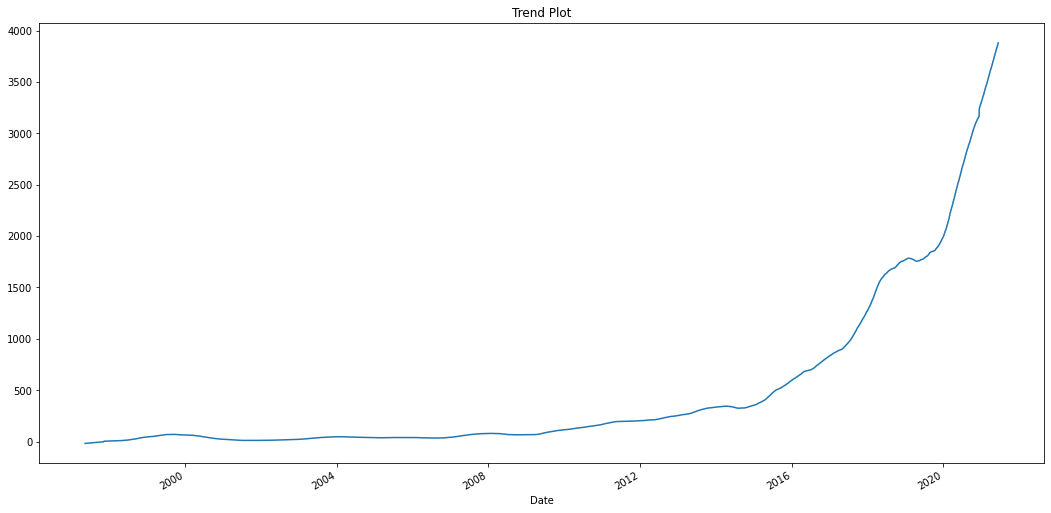

In [9]:
# Trend plot for Amazon Stock Price(Close)

plt.figure(figsize = (18,9))
result.trend.plot()
plt.title("Trend Plot");

This is the trend plot for historical Amazon stock price(Close price). We can see an increasing trend with some flucations.

## We decide the parameter(D, S) of the model below

"S" stands for seasonality, and we can determine the value for seasonality from the seasonal plot. From the graphs below, we can see the pattern happen roughly every 12 month. Therefore, we will use S=12 and D = 1 later when fitting the SARIMA model. D = 1 means that the model only does one differencing.

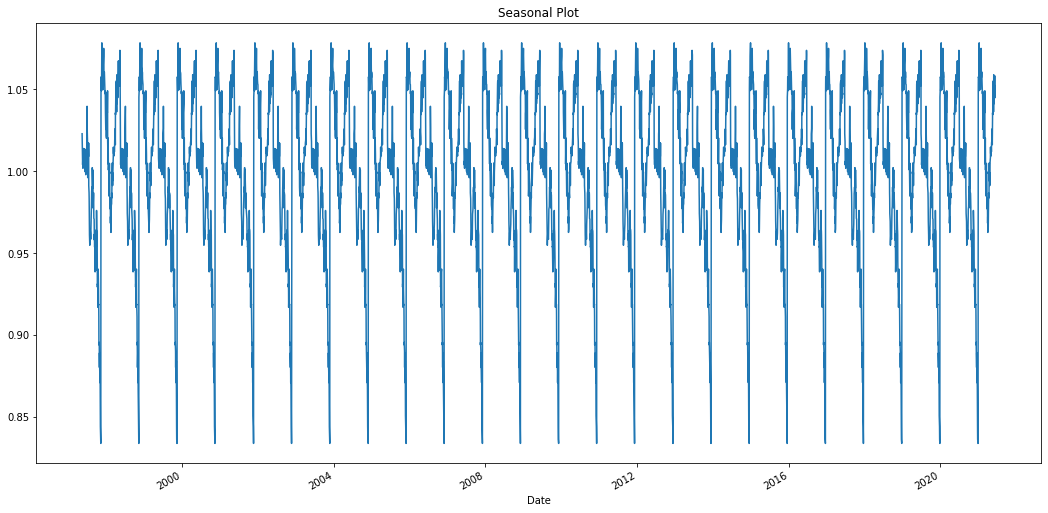

In [10]:
# Seasonal plot for Amazon Stock Price(Close)

plt.figure(figsize = (18,9))
result.seasonal.plot()
plt.title("Seasonal Plot");

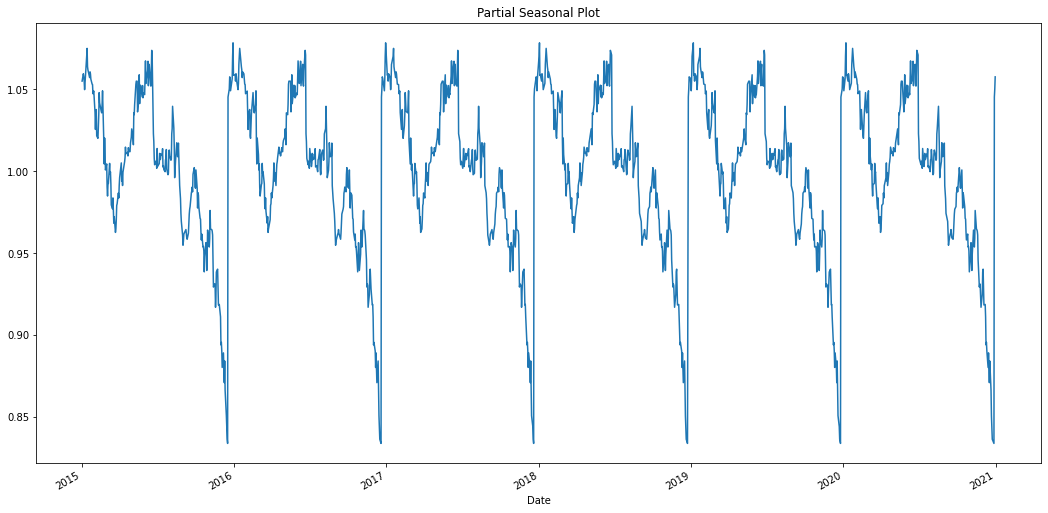

In [11]:
# Partial Seasonal plot for Amazon Stock Price(Close)

plt.figure(figsize = (18,9))
result.seasonal['2015':'2020'].plot()
plt.title("Partial Seasonal Plot");

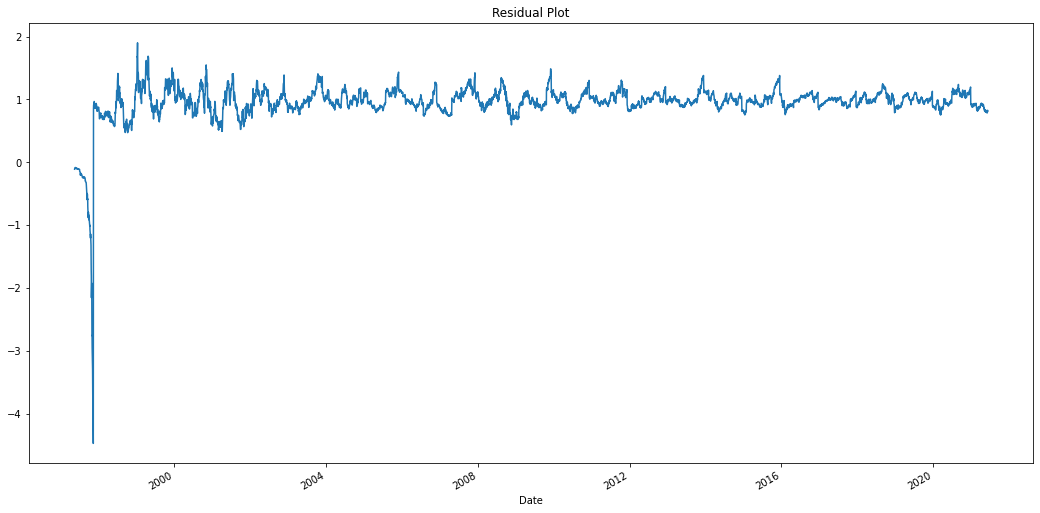

In [12]:
# Residual plot for Amazon Stock Price(Close)

plt.figure(figsize = (18,9))
result.resid.plot()
plt.title("Residual Plot");

From this residual plot, we can see it is not homoscedastic. However, the residual plot becomes robust starting from 2003. Besides, there is still plenty of data after 2003. Thus, we are not going to use the data before 2003 to predict the stock price. 

## Modify the training set

In [13]:
training_set = training_set.loc['2003-01-02':, :]
training_set 

Open         High          Low        Close    Adj Close  \
Date                                                                          
2003-01-02    19.190001    19.680000    18.549999    19.570000    19.570000   
2003-01-03    19.590000    20.530001    19.410000    20.520000    20.520000   
2003-01-06    20.400000    21.170000    20.299999    20.700001    20.700001   
2003-01-07    20.830000    21.750000    20.600000    21.549999    21.549999   
2003-01-08    21.440001    21.600000    20.820000    21.020000    21.020000   
...                 ...          ...          ...          ...          ...   
2021-06-07  3197.330078  3208.000000  3172.199951  3198.010010  3198.010010   
2021-06-08  3222.610107  3279.530029  3218.010010  3264.110107  3264.110107   
2021-06-09  3272.870117  3297.580078  3270.699951  3281.149902  3281.149902   
2021-06-10  3282.010010  3351.000000  3281.149902  3349.649902  3349.649902   
2021-06-11  3349.649902  3366.580078  3333.449951  3346.830078  3346.830078   

             Volume  
Date                 
2003-01-02  6484000  
2003-01-03  8757000  
2003-01-06  7698100  
2003-01-07  9568200  
2003-01-08  6981500  
...             ...  
2021-06-07  2215800  
2021-06-08  3416700  
2021-06-09  2455500  
2021-06-10  3476500  
2021-06-11  2817400  

[4643 rows x 6 columns]

In [14]:
# ETS Decomposition

result2 = seasonal_decompose(training_set['Close'], model ='multiplicative', freq=253, extrapolate_trend='freq')

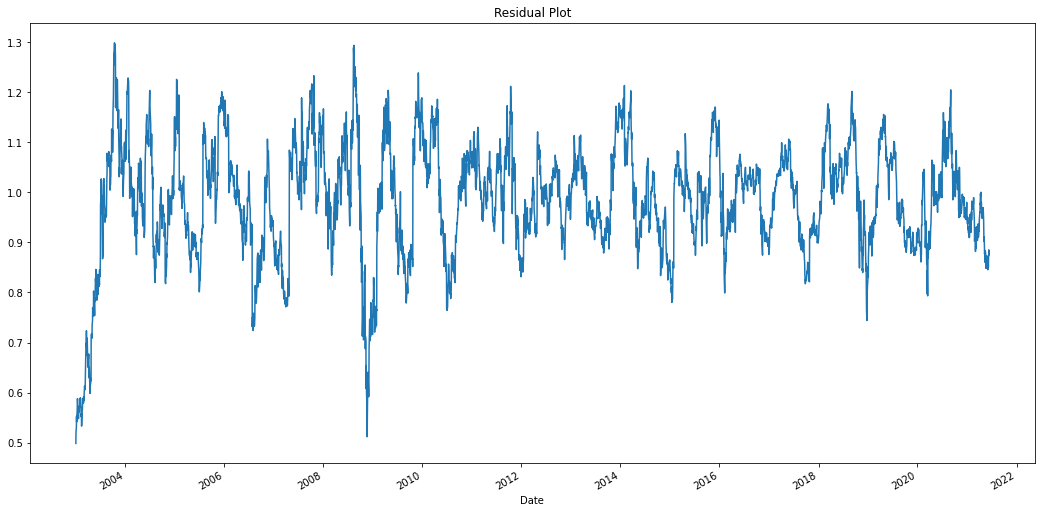

In [15]:
plt.figure(figsize = (18,9))
result2.resid.plot()
plt.title("Residual Plot");

## Decide the parameter(P, Q) of the model below

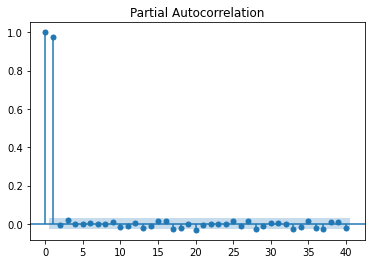

In [16]:
# Partial Autocorrelation function(PACF) graph

import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(result2.resid.values.squeeze(), lags = 40)
plt.show()

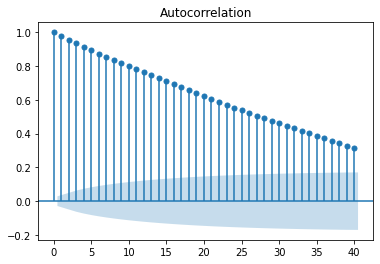

In [17]:
# Autocorrelation function(ACF) graph

sm.graphics.tsa.plot_acf(result2.resid.values.squeeze(), lags = 40)
plt.show()

From the PACF and ACF plots above, we can see there are 2 significant magnitudes in the PACF plot and there are lots of significant spikes in the ACF plot. Thus, P = 2, and Q = 0. 

In [20]:
# Fit SARIMAX Model

from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(training_set['Close'], 
                order = (2, 0, 0), 
                seasonal_order =(0, 1, 0, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 4643
Model:             SARIMAX(2, 0, 0)x(0, 1, 0, 12)   Log Likelihood              -21981.967
Date:                            Mon, 28 Jun 2021   AIC                          43969.935
Time:                                    18:49:19   BIC                          43989.256
Sample:                                         0   HQIC                         43976.733
                                           - 4643                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9145      0.006    163.487      0.000       0.904       0.925
ar.L2         -0.0163      0.006     -2.914      0.004      -0.027      -0.005
sigma2       777.0973      4.881    159.215      0.000     767.531     786.663
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             88229.93
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):             444.22   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

From the summary, we can tell this model is pretty reasonable, since the p-values are significant.

In [21]:
# Predicted values for the test data 

start = len(training_set)
end = len(training_set) + len(test_set) - 1

predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

In [22]:
print('Prediction for the test data:')
predictions

Prediction for the test data:


4643    3343.734337
4644    3300.540350
4645    3286.202013
4646    3275.239862
4647    3284.715873
4648    3232.479475
4649    3246.977708
4650    3234.544268
4651    3296.858540
4652    3310.504811
Name: Predictions, dtype: float64

In [23]:
# Calculate the root mean square error(rmse)

rmse_arima = (np.mean((test_set['Close'].values - predictions) ** 2)) ** 0.5
print('RMSE for the SARIMA model:')
rmse_arima

RMSE for the SARIMA model:


182.09056958230966

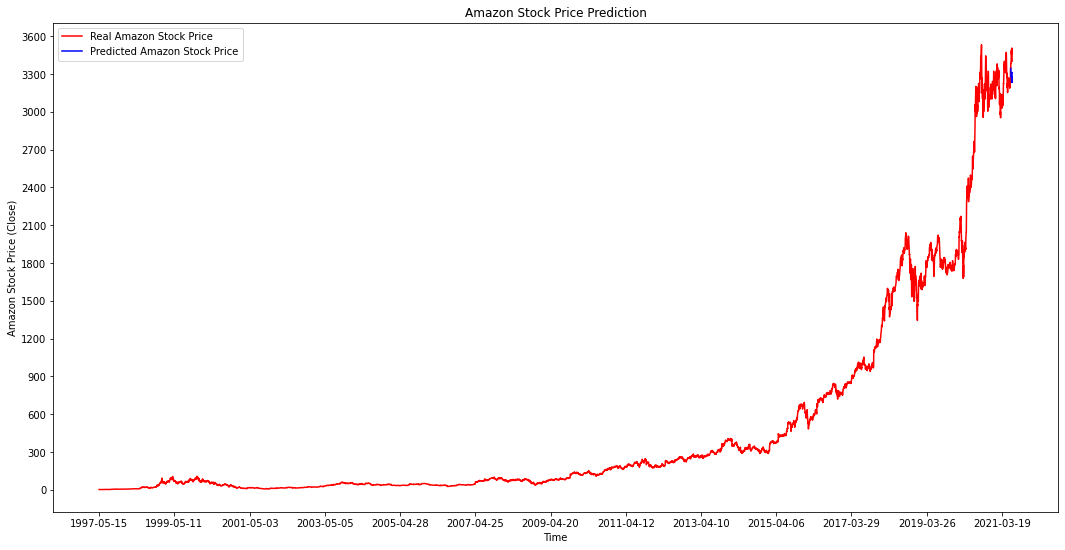

In [24]:
# Visualize the results(Real vs. Predicted)
# Real Amazon stock price in red, and predicted stock price in blue

plot_dat = pd.read_csv('AMZN.csv')
plt.figure(figsize = (18,9))
plt.plot(plot_dat.loc[:, 'Date'],plot_dat.iloc[:, 4:5].values, color = 'red', label = 'Real Amazon Stock Price')
plt.plot(plot_dat.loc[idx:, 'Date'],predictions, color = 'blue', label = 'Predicted Amazon Stock Price')
plt.yticks(np.arange(0,3700,300))
plt.xticks(np.arange(0,6100,500))
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price (Close)')
plt.legend()
plt.show()

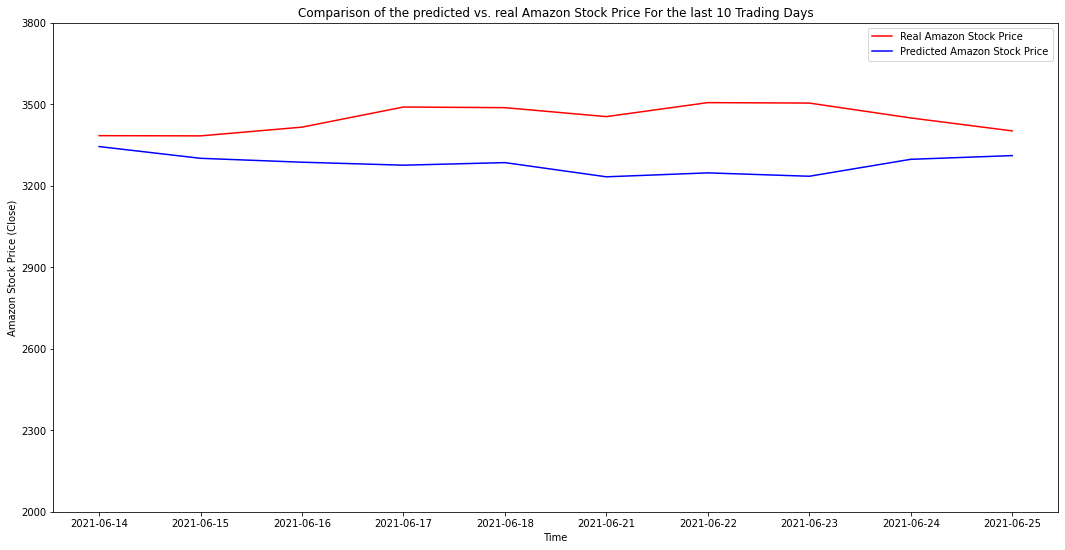

In [25]:
# Comparison of the predicted vs. real Amazon Stock Price

plt.figure(figsize = (18,9))
plt.plot(plot_dat.loc[idx:, 'Date'],plot_dat.iloc[idx:, 4:5].values, color = 'red', label = 'Real Amazon Stock Price')
plt.plot(plot_dat.loc[idx:, 'Date'],predictions, color = 'blue', label = 'Predicted Amazon Stock Price')
plt.xticks(np.arange(0,10,1))
plt.yticks(np.arange(2000,4000,300))
plt.title('Comparison of the predicted vs. real Amazon Stock Price For the last 10 Trading Days')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price (Close)')
plt.legend()
plt.show()

In this plot, we can see the predicted values are pretty close to the real values. 

## Predictions for the next 10 trading days


In [26]:
# Fit the SARIMAX model for the entire dataset

final_arima_model = SARIMAX(df['Close']['2003':], 
                order = (1, 1, 0), 
                seasonal_order =(0, 1, 0, 12))
  
result_arima = final_arima_model.fit()
result_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 4653
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood              -22154.747
Date:                            Mon, 28 Jun 2021   AIC                          44313.494
Time:                                    18:49:28   BIC                          44326.379
Sample:                                         0   HQIC                         44318.028
                                           - 4653                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0315      0.006     -5.440      0.000      -0.043      -0.020
sigma2       822.0469      4.736    173.582      0.000     812.765     831.329
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            111624.47
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):             446.81   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
# Prediction for the next ten days

forecast = result_arima.get_forecast(10)
  
pred_close = forecast.predicted_mean
pred_close

4653    3471.997282
4654    3469.113265
4655    3506.155327
4656    3505.415029
4657    3537.535148
4658    3611.525138
4659    3609.185050
4660    3576.245109
4661    3627.725089
4662    3626.105216
Name: predicted_mean, dtype: float64

In [28]:
# Calculate the 95% confidence interval for the predictions

conf = forecast.conf_int()

In [29]:
for_10_arima = pd.DataFrame()
for_10_arima['Close'] = pred_close
date = ['2021-06-29', '2021-06-30', '2021-07-01', '2021-07-02', '2021-07-06', '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-12', '2021-07-13']
for_10_arima['Date'] = date
for_10_arima = for_10_arima[["Date", "Close"]]
for_10_arima['Lower Interval'] = conf['lower Close']
for_10_arima['Upper Interval'] = conf['upper Close']
print("Next 10 Days' Amazon Stock Prediction")
for_10_arima.set_index([np.arange(6069, 6079, 1)], inplace = True)
for_10_arima

Next 10 Days' Amazon Stock Prediction


Date        Close  Lower Interval  Upper Interval
6069  2021-06-29  3471.997282     3415.802450     3528.192114
6070  2021-06-30  3469.113265     3390.883756     3547.342774
6071  2021-07-01  3506.155327     3410.824699     3601.485955
6072  2021-07-02  3505.415029     3395.616078     3615.213980
6073  2021-07-06  3537.535148     3414.963958     3660.106339
6074  2021-07-07  3611.525138     3477.392429     3745.657847
6075  2021-07-08  3609.185050     3464.411190     3753.958910
6076  2021-07-09  3576.245109     3421.560406     3730.929812
6077  2021-07-12  3627.725089     3463.727393     3791.722785
6078  2021-07-13  3626.105216     3453.295693     3798.914739

In [30]:
# Combine the entire data set with the prediction

result = pd.concat([plot_dat, for_10_arima], axis=0, join="inner")

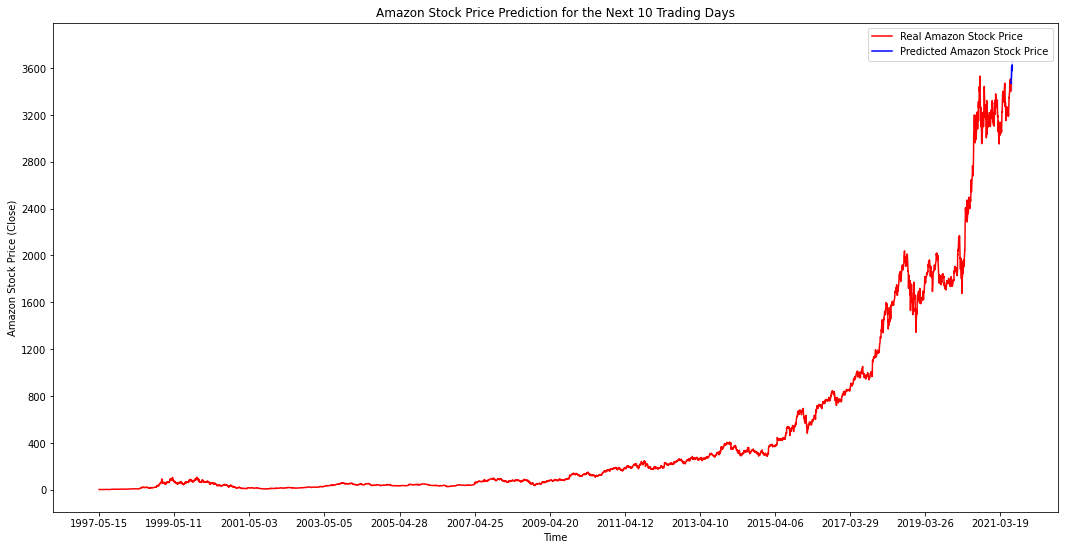

In [31]:
# Visualize the prediction results with 95% confidence interval

idx2 = df.shape[0]
plt.figure(figsize = (18,9))
plt.plot(result.loc[:idx2, 'Date'],result.loc[:idx2, 'Close'].values, color = 'red', label = 'Real Amazon Stock Price')
plt.plot(result.loc[idx2:, 'Date'],result.loc[idx2:, 'Close'].values, color = 'blue', label = 'Predicted Amazon Stock Price')
plt.fill_between(result.loc[idx2:, 'Date'], for_10_arima.loc[idx2:, 'Lower Interval'].values, for_10_arima.loc[idx2:, 'Upper Interval'].values, color='blue', alpha=0.1)
plt.yticks(np.arange(0,4000,400))
plt.xticks(np.arange(0,idx2,500))
plt.title('Amazon Stock Price Prediction for the Next 10 Trading Days')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price (Close)')
plt.legend()
plt.show()

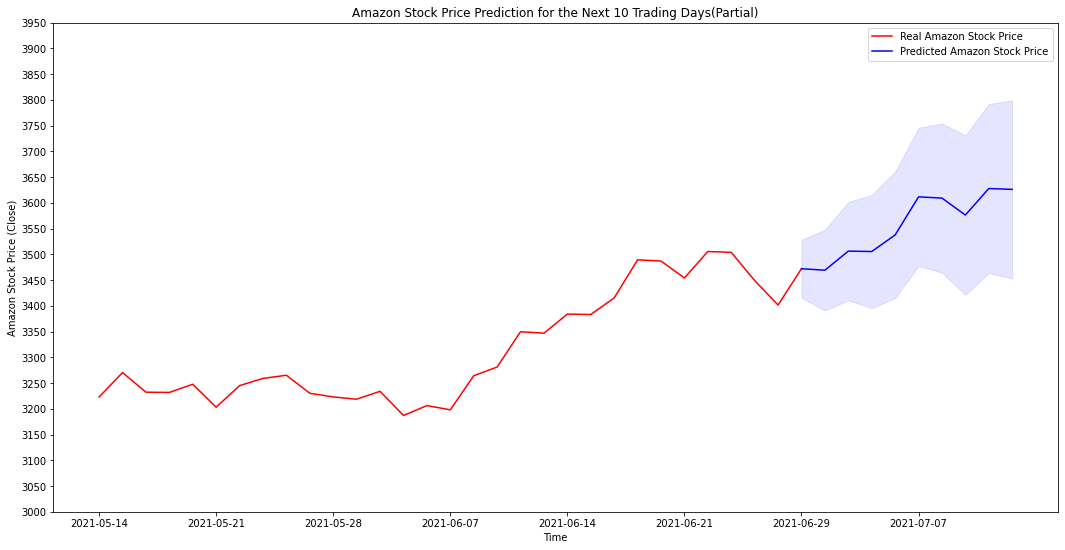

In [32]:
# Visualize the prediction results

plt.figure(figsize = (18,9))
plt.plot(result.loc[idx2-30:idx2, 'Date'],result.loc[idx2-30:idx2, 'Close'].values, color = 'red', label = 'Real Amazon Stock Price')
plt.plot(result.loc[idx2:, 'Date'],result.loc[idx2:, 'Close'].values, color = 'blue', label = 'Predicted Amazon Stock Price')
plt.fill_between(result.loc[idx2:, 'Date'], for_10_arima.loc[idx2:, 'Lower Interval'].values, for_10_arima.loc[idx2:, 'Upper Interval'].values, color='blue', alpha=0.1)
plt.yticks(np.arange(3000,4000,50))
plt.xticks(np.arange(0,40,5))
plt.title('Amazon Stock Price Prediction for the Next 10 Trading Days(Partial)')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price (Close)')
plt.legend()
plt.show()